### AIN429 Data Mining Laboratory
##### Assignment 2: Frequent Pattern Mining
##### Date Issued : 29.11.2022
##### Date Due : 06.12.2022
##### Name: Sare Naz
##### Surname : Ersoy
##### Number: 21992957
### Aim of the Experiment
In this assignment, we will focus on frequent pattern mining , which is an analytical process that finds frequent patterns, associations, or causal structures from data sets. We are required to implement the Apriori and FP-Growth algorithm and apply it to mine frequent itemsets from a real-life data set. At the end of this exercise, we will become familiar with frequent pattern mining methods using Python libraries.
### Frequent Pattern Mining
Frequent Pattern is a pattern which appears frequently in a data set. By identifying frequent patterns we can observe strongly correlated items together and easily identify similar characteristics, associations among them. By doing frequent pattern mining, it leads to further analysis like clustering, classification and other data mining tasks.
### Apriori Algorithm
The Apriori algorithm is used for mining frequent itemsets and devising association rules from a transactional database. The parameters “support” and “confidence” are used. Support refers to items’ frequency of occurrence; confidence is a conditional probability. Items in a transaction form an item set. The algorithm begins by identifying frequent, individual items (items with a frequency greater than or equal to the given support) in the database and continues to extend them to larger, frequent itemsets.
### The following are the main steps of the algorithm:
 1. Calculate the support of item sets (of size k = 1) in the transactional database
(note that support is the frequency of occurrence of an itemset). This is called
generating the candidate set.
 2. Prune the candidate set by eliminating items with a support less than the given
threshold.
 3. Join the frequent itemsets to form sets of size k + 1, and repeat the above sets
until no more itemsets can be formed. This will happen when the set(s) formed
have a support less than the given support.

### FP Growth Algorithm
The FP-Growth Algorithm is an alternative way to find frequent item sets without using candidate generations, thus improving performance. For so much, it uses a divide-and-conquer strategy. The core of this method is the usage of a special data structure named frequent-pattern tree (FP-tree), which retains the item set association information.

### This algorithm works as follows:

1. First, it compresses the input database creating an FP-tree instance to represent frequent items.
2. After this first step, it divides the compressed database into a set of conditional databases, each associated with one frequent pattern.
3. Finally, each such database is mined separately.

### Experiment

1. Download the dataset. The dataset will be shared on the Piazza group.
2. Perform preprocessing steps that may be necessary to clean or filter the data.
3. Analyze the dataset using tables and graphs.
4. Clearly explain analysis results.
5. Apply the Apriori and FP-growth algorithm (min_support=0.01).
6. Compare the performance of Apriori and the FP-growth algorithm using tables
and graphs.
7. Summarize and interpret your results.
8. You should submit your codes and report as a single Jupyter notebook

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from IPython.core.display import display, HTML
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))
import time
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

C:\Users\saren\AppData\Local\Temp\ipykernel_9228\2825805127.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


C:\Users\saren\anaconda3\lib\site-packages\matplotlib_inline\config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


### Data Integrity and Description
First, the data will be checked for completeness and integrity. This will also provide an opportunity to quickly overview the data set and prepare the future steps.

Member_no: Identifier for customer making the purchase.
Date: Item buyed date
item: The item that buyed

In [2]:
#I read the data
df = pd.read_csv("data.csv")
df.head()

,Member_no,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Member_no  38765 non-null  int64 
 1   Date       38765 non-null  object
 2   item       38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
NULLCOUNT = df.isnull().sum(axis=1)
NULLCOUNT.sum()
#Here you see, there is no nan value. member_no is int, date and item are objects which is correct types. There are 38765 rows and 3 columns.
#Since I will do the frequent pattern minnig, I will drop the columns except items that I will be calculating the frequencies.

0

In [5]:
# Converting the 'date_time' column into the right format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Extracting year
df['Year'] = df['Date'].dt.year

In [7]:
# Extracting month and replacing it with text
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [8]:
# dropping date_time column
df.drop('Date', axis = 1, inplace = True)

In [9]:
df

,Member_no,item,Year,Month
0,1808,tropical fruit,2015,July
1,2552,whole milk,2015,May
2,2300,pip fruit,2015,September
3,1187,other vegetables,2015,December
4,3037,whole milk,2015,January
...,...,...,...,...
38760,4471,sliced cheese,2014,August
38761,2022,candy,2014,February
38762,1097,cake bar,2014,April
38763,1510,fruit/vegetable juice,2014,March


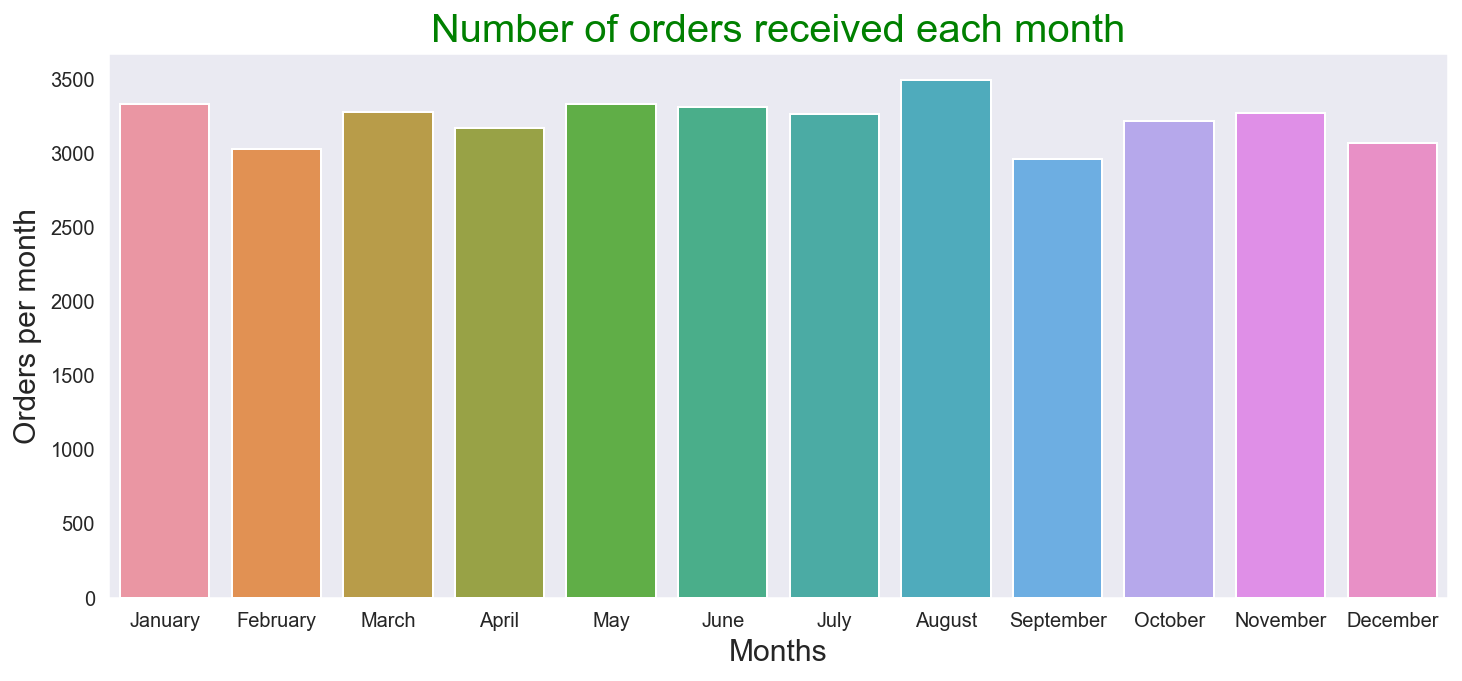

In [10]:
monthTran = df.groupby('Month')['Member_no'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "Month", y = "Member_no")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

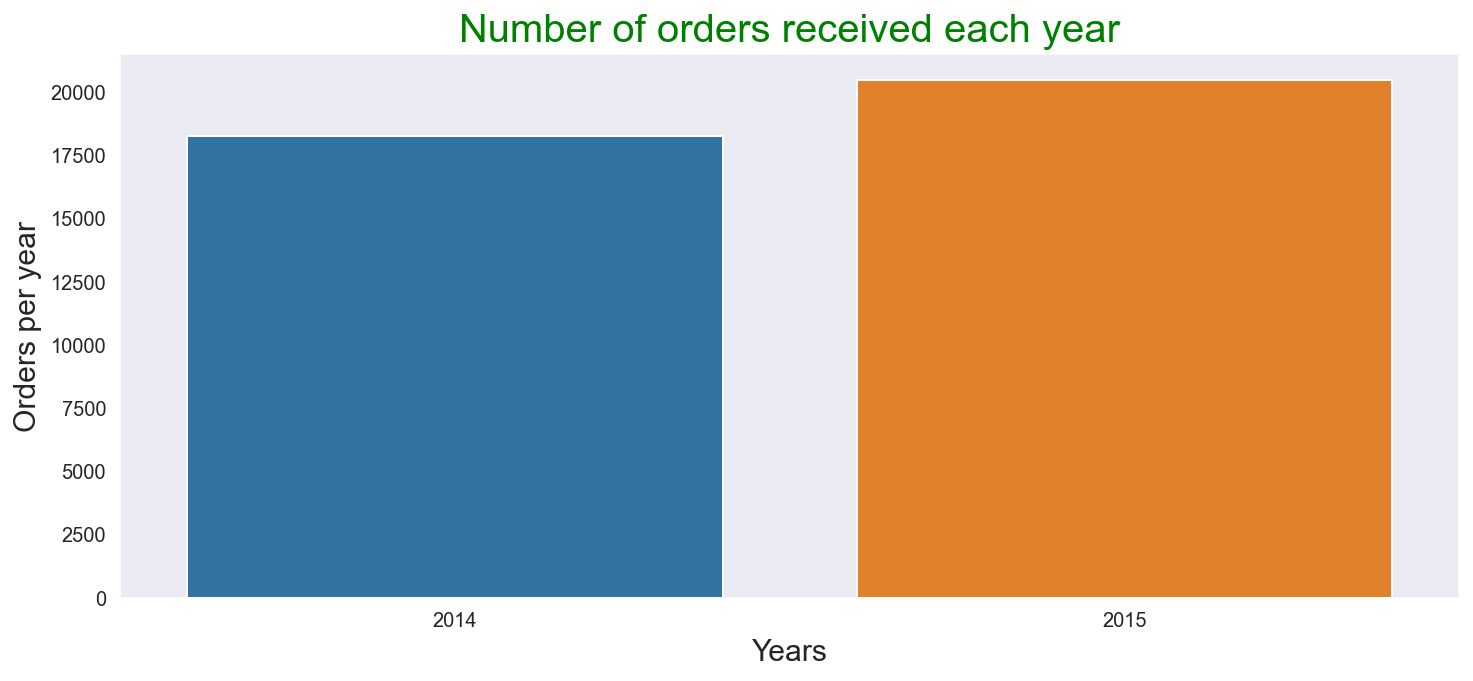

In [11]:
yearTran = df.groupby('Year')['Member_no'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = yearTran, x = "Year", y = "Member_no")
plt.xlabel('Years', size = 15)
plt.ylabel('Orders per year', size = 15)
plt.title('Number of orders received each year', color = 'green', size = 20)
plt.show()


plt.show()

### Data Preparation

In [12]:
df = df.drop(columns = ["Member_no", "Month","Year"])
df

,item
0,tropical fruit
1,whole milk
2,pip fruit
3,other vegetables
4,whole milk
...,...
38760,sliced cheese
38761,candy
38762,cake bar
38763,fruit/vegetable juice


I will replace the "/" with ","

In [13]:
df["item"] = df["item"].replace("/",",", regex=True)

In [14]:
df.values

array([['tropical fruit'],
       ['whole milk'],
       ['pip fruit'],
       ...,
       ['cake bar'],
       ['fruit,vegetable juice'],
       ['cat food']], dtype=object)

Here we can find that data needs a lot of preprocessing.So let's preprocess the data.We use the TransactionEncoder() of mlxtend.preprocessing to do this work for us.The TransactionEncoder() is an Encoder class for transaction data in Python list.It finds out what are all the different products in the transactions and will assign each transaction a list which contains a boolean array where each index represents the corresponding product whether purchased in the transaction or not i.e. True or False.

It needs input as a python list of lists, where the outer list stores the n transactions and the inner list stores the items.

It returns the one-hot encoded boolean array of the input transactions, where the columns represent the unique items found in the input array in alphabetic order.

In [15]:
data = list(df["item"].apply(lambda x:x.split(',')))
data #Here is my transactions. It contains only one and two items

[['tropical fruit'],
 ['whole milk'],
 ['pip fruit'],
 ['other vegetables'],
 ['whole milk'],
 ['rolls', 'buns'],
 ['other vegetables'],
 ['pot plants'],
 ['whole milk'],
 ['tropical fruit'],
 ['citrus fruit'],
 ['beef'],
 ['frankfurter'],
 ['chicken'],
 ['butter'],
 ['fruit', 'vegetable juice'],
 ['packaged fruit', 'vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk'],
 ['whole milk'],
 ['tropical fruit'],
 ['tropical fruit'],
 ['bottled water'],
 ['yogurt'],
 ['sausage'],
 ['other vegetables'],
 ['brown bread'],
 ['yogurt'],
 ['hamburger meat'],
 ['root vegetables'],
 ['pork'],
 ['beef'],
 ['pastry'],
 ['fruit', 'vegetable juice'],
 ['canned beer'],
 ['root vegetables'],
 ['citrus fruit'],
 ['sausage'],
 ['tropical fruit'],
 ['berries'],
 ['canned beer'],
 ['butter milk'],
 ['coffee'],
 ['pastry'],
 ['rolls', 'buns'],
 ['misc. beverages'],
 ['root vegetables'],
 ['sausage'],
 ['canned beer'],
 ['ham'],
 ['turkey'],
 ['whole milk'],
 ['whole milk']

In [16]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
te_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [17]:
te_data.astype("int")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'blush wine',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'buns',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'fertilizer',
 'film',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen f

In [19]:
df = pd.DataFrame(te_data, columns=te.columns_)

In [20]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,blush wine,bottled beer,bottled water,brandy,brown bread,buns,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,fertilizer,film,finished products,fish,flour,flower (seeds),flower soil,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts,oil,onions,organic products,organic sausage,other vegetables,packaged fruit,pasta,pastry,pet care,photo,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,prunes,pudding powder,ready soups,red,rice,roll products,rolls,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sour cream,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vegetable juice,vegetables,vinegar,waffles,whipped,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

The Ones and Zeros in the matrix are boolean values, they could also be respectively replaced by True and False, where:

True means that the item exists in the transaction
False means it does not

[Text(0, 0, 'whole milk'),
 Text(1, 0, 'other vegetables'),
 Text(2, 0, 'rolls'),
 Text(3, 0, 'buns'),
 Text(4, 0, 'soda'),
 Text(5, 0, 'yogurt'),
 Text(6, 0, 'root vegetables'),
 Text(7, 0, 'tropical fruit'),
 Text(8, 0, 'bottled water'),
 Text(9, 0, 'sausage'),
 Text(10, 0, 'citrus fruit'),
 Text(11, 0, 'pastry'),
 Text(12, 0, 'pip fruit'),
 Text(13, 0, 'shopping bags'),
 Text(14, 0, 'canned beer'),
 Text(15, 0, 'bottled beer'),
 Text(16, 0, 'sour cream'),
 Text(17, 0, 'whipped'),
 Text(18, 0, 'newspapers'),
 Text(19, 0, 'frankfurter')]

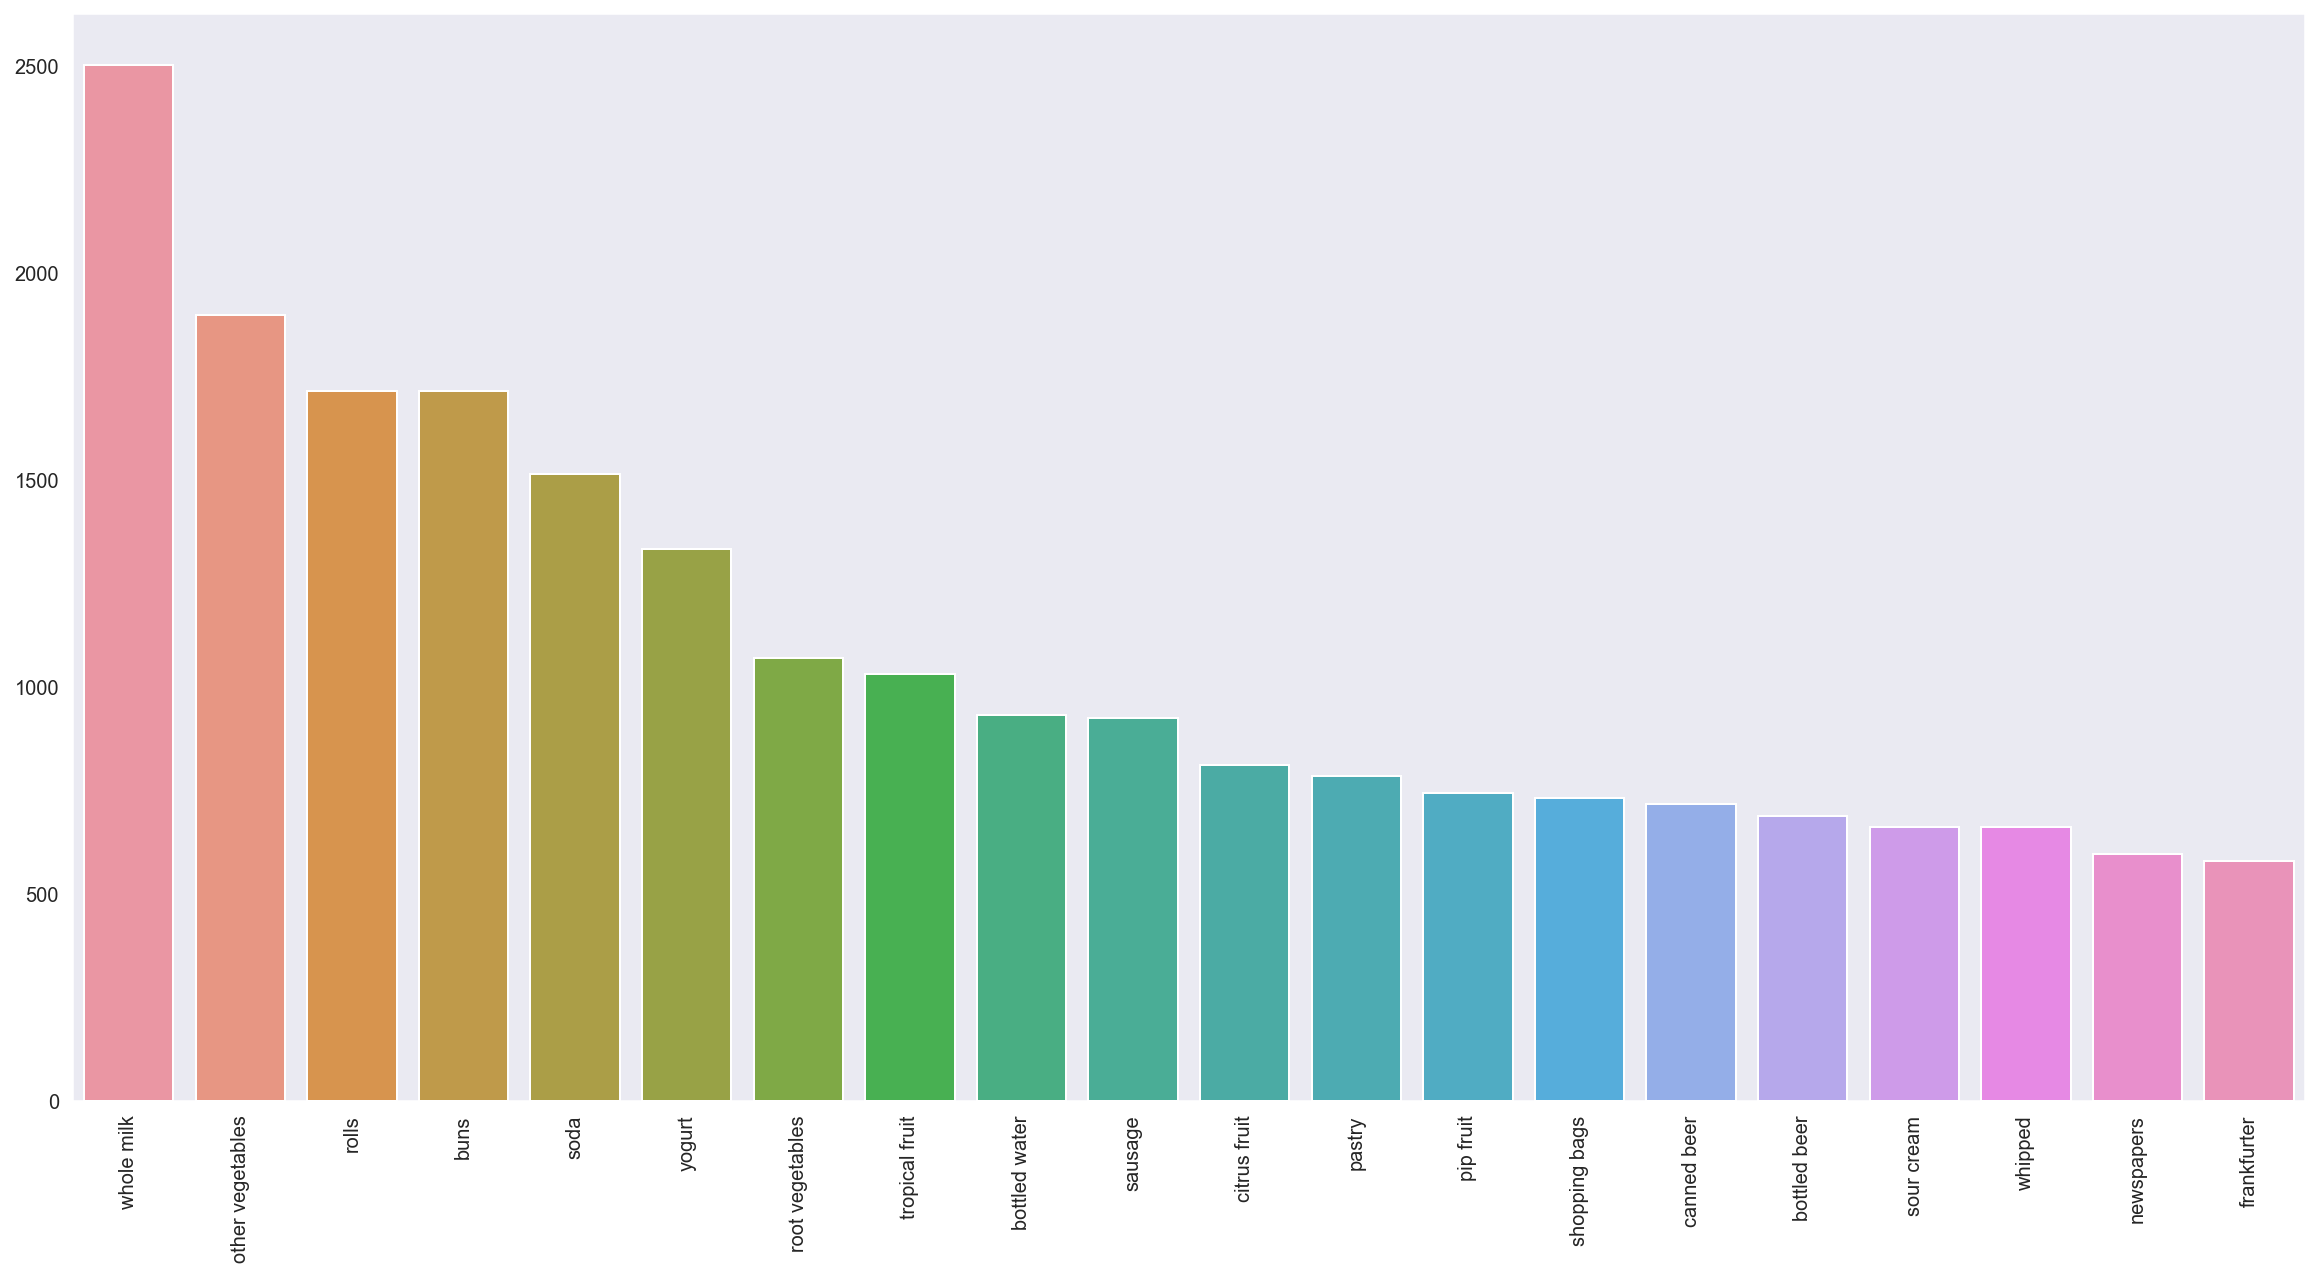

In [21]:

##Lets consider the top 20 items purchased freequently


r=pd.DataFrame(te_data.astype("int"), columns=te.columns_).sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

(0.0, 100.0, 0.0, 100.0)

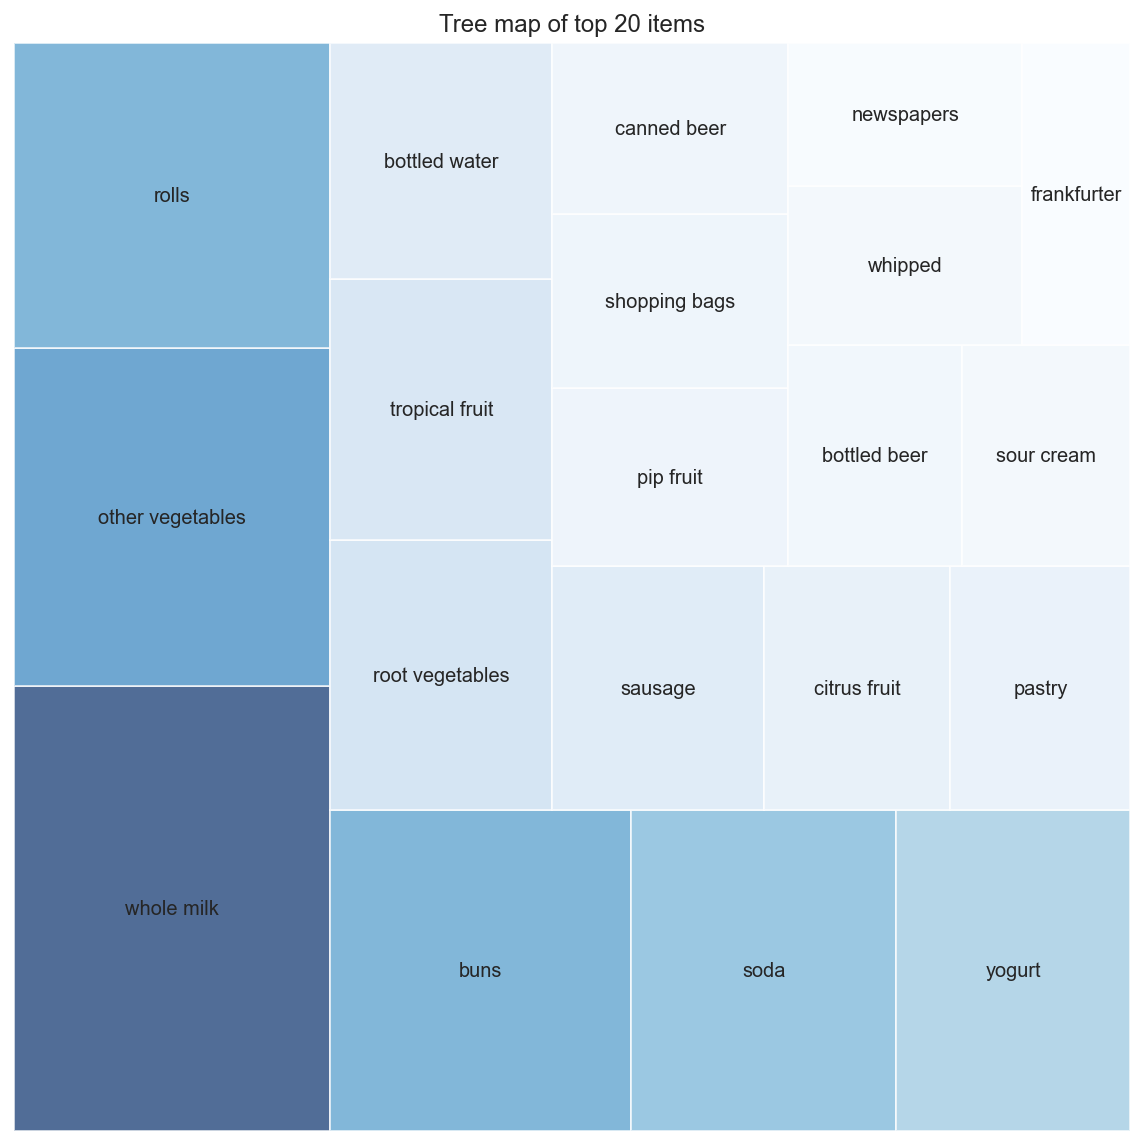

In [22]:
# create a color palette, mapped to these values
my_values = r.values
cmap = plt.cm.Blues
mini= min(my_values)
maxi= max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

### Implementing Apriori Algorithm
he first step in order to create a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low, then the algorithm will take longer to execute and we will get a lot of rules (most of them will not be useful). Then, what values do we choose? We can try different values of support and confidence and see graphically how many rules are generated for each combination. We set the min_sup as 0.01.
Using the 'apriori algorithm' with min_support=0.01 (0.01% of 38765 )
It means the item should be present in atleast 3.8 transaction out of 38765  transactions only when we considered that item in

In [23]:
start = time.time()
df1 = apriori(df,min_support=0.01,use_colnames=True)
end = time.time()
t1 = end-start

In [24]:
df1
#Here is you can see the support values for items.

,support,itemsets
0,0.013311,(beef)
1,0.017722,(bottled beer)
2,0.024068,(bottled water)
3,0.014730,(brown bread)
4,0.044267,(buns)
5,0.013775,(butter)
6,0.018496,(canned beer)
7,0.010886,(chicken)
8,0.020947,(citrus fruit)
9,0.012279,(coffee)


In [25]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1 = df1.sort_values(by="support",ascending=False)
df1.head(20)

,support,itemsets,length
30,0.064543,(whole milk),1
17,0.048962,(other vegetables),1
32,0.044267,"(rolls, buns)",2
4,0.044267,(buns),1
21,0.044267,(rolls),1
25,0.039056,(soda),1
31,0.034412,(yogurt),1
22,0.027628,(root vegetables),1
27,0.026622,(tropical fruit),1
2,0.024068,(bottled water),1


Support value gives us these information:
Head 5

6.4 percent of 100 purchases are "whole milk"

4.8 percent of 100 purchases are "other vegetables"

4.4 percent of 100 purchases are "buns, rolls"

4.4 percent of 100 purchases are "buns"

4.4 percent of 100 purchases are "rolls"

(The last tree is sense because if the combinations of the two items are frequent, they are alse frequent individually)

### Implementing FP Growth Algorithm
The idea behind the FP Growth algorithm is to find the frequent itemsets in a dataset while being faster than the Apriori algorithm. The Apriori algorithm basically goes back and forth to the data set to check for the co-occurrence of products in the data set.

In order to be faster, the FP algorithm changed the organization of the data into a tree rather than sets. This tree data structure allows for faster scanning, and this is where the algorithm wins time.

In [26]:
from mlxtend.frequent_patterns import fpgrowth

In [27]:
start = time.time()
df2 = fpgrowth(df, min_support=0.01, use_colnames=True)
end = time.time()
t2 = end-start

In [28]:
df2['length'] = df2['itemsets'].apply(lambda x:len(x))
df2 = df2.sort_values(by="support",ascending=False)

In [29]:
df2.head(20)

,support,itemsets,length
1,0.064543,(whole milk),1
3,0.048962,(other vegetables),1
32,0.044267,"(rolls, buns)",2
4,0.044267,(buns),1
5,0.044267,(rolls),1
22,0.039056,(soda),1
14,0.034412,(yogurt),1
17,0.027628,(root vegetables),1
0,0.026622,(tropical fruit),1
13,0.024068,(bottled water),1


Support value gives us these information: Head 5

6.4 percent of 100 purchases are "whole milk"

4.8 percent of 100 purchases are "other vegetables"

4.4 percent of 100 purchases are "buns, rolls"

4.4 percent of 100 purchases are "buns"

4.4 percent of 100 purchases are "rolls"

As you see, there is no difference between the results of Apriori and FP-Growth except execution time.

### Apriori Vs FP Growth
Since FP-Growth doesn't require creating candidate sets explicitly, it can be magnitudes faster than the alternative Apriori algorithm. FP-Growth is about 5 times faster in best case.Let's look at it.

##### Execution Time

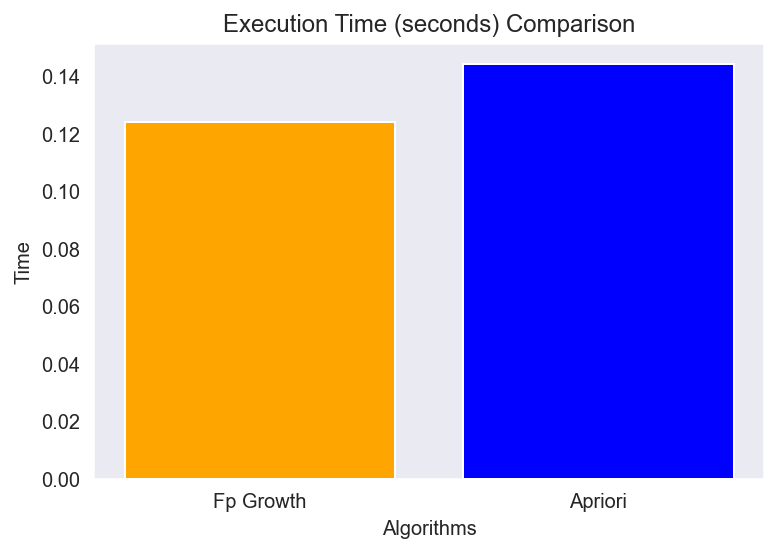

In [30]:
algo1 = ['Fp Growth', t2]
algo2 = ['Apriori', t1]
execution_times = [algo1[1], algo2[1]]
algo_names = (algo1[0], algo2[0])
y=np.arange(len(algo_names))
    
plt.bar(y,execution_times,color=['orange', 'blue'])
plt.xticks(y,algo_names)
plt.xlabel('Algorithms')
plt.ylabel('Time')
plt.title("Execution Time (seconds) Comparison")
plt.show()